In [154]:
import os
import json
import jsonlines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
BASE_DIR = "/home/ubuntu/vishalk/litellm/AgentBench/outputs/"
DBBENCH = 'dbbench-std'
WEBSHOP = 'webshop-std'
OSS = 'os-std'
M2W = 'm2w-std'

In [156]:
def load_overall_json(path):
    with open(path, 'r') as f:
        return json.load(f)

def load_runs_jsonl(path):
    data = []
    with jsonlines.open(path) as reader:
        for obj in reader:
            data.append(obj)
    return data

def load_results(base_dir):
    results = {}
    for caching_type in ['withCaching0', 'withoutCaching0', 'withShareGPT0']:
        caching_path = os.path.join(base_dir, caching_type)
        if not os.path.isdir(caching_path):
            continue

        results[caching_type] = {}

        for org_name in os.listdir(caching_path):
            org_path = os.path.join(caching_path, org_name)
            if not os.path.isdir(org_path):
                continue

            results[caching_type][org_name] = {}

            for model_name in os.listdir(org_path):
                model_path = os.path.join(org_path, model_name)
                if not os.path.isdir(model_path):
                    continue

                results[caching_type][org_name][model_name] = {}

                for task_name in os.listdir(model_path):
                    task_path = os.path.join(model_path, task_name)
                    overall_path = os.path.join(task_path, 'overall.json')
                    runs_path = os.path.join(task_path, 'runs.jsonl')

                    if os.path.exists(overall_path) and os.path.exists(runs_path):
                        results[caching_type][org_name][model_name][task_name] = {
                            'overall': load_overall_json(overall_path),
                            'runs': load_runs_jsonl(runs_path)
                        }

    return results




In [157]:
values = load_results(BASE_DIR)

In [158]:
results_caching = values["withCaching0"]["deepseek-ai"]["DeepSeek-R1-Distill-Qwen-14B"]
results_without_caching = values["withoutCaching0"]["deepseek-ai"]["DeepSeek-R1-Distill-Qwen-14B"]
results_with_sharegpt = values["withShareGPT0"]["deepseek-ai"]["DeepSeek-R1-Distill-Qwen-14B"]
# results_with_sharegpt_10 = values["shareGPT10"]["deepseek-ai"]["DeepSeek-R1-Distill-Qwen-14B"]

In [159]:
DBBENCH_DURATION_CACHED = results_caching[DBBENCH]["overall"]["duration_seconds"]
# OSS_DURATION_CACHED = results_caching[OSS]["overall"]["duration_seconds"]
M2W_DURATION_CACHED = results_caching[M2W]["overall"]["duration_seconds"]
WEBSHOP_DURATION_CACHED = results_caching[WEBSHOP]["overall"]["duration_seconds"]

In [160]:
DBBENCH_DURATION_UNCACHED = results_without_caching[DBBENCH]["overall"]["duration_seconds"]
# OSS_DURATION_UNCACHED = results_without_caching[OSS]["overall"]["duration_seconds"]
M2W_DURATION_UNCACHED = results_without_caching[M2W]["overall"]["duration_seconds"]
WEBSHOP_DURATION_UNCACHED = results_without_caching[WEBSHOP]["overall"]["duration_seconds"]

In [161]:
DBBENCH_DURATION_SHAREGPT = results_with_sharegpt[DBBENCH]["overall"]["duration_seconds"]
# OSS_DURATION_SHAREGPT = results_with_sharegpt[OSS]["overall"]["duration_seconds"]
M2W_DURATION_SHAREGPT = results_with_sharegpt[M2W]["overall"]["duration_seconds"]
WEBSHOP_DURATION_SHAREGPT = results_with_sharegpt[WEBSHOP]["overall"]["duration_seconds"]

In [162]:
# DBBENCH_DURATION_SHAREGPT10 = results_with_sharegpt_10[DBBENCH]["overall"]["duration_seconds"]
# OSS_DURATION_SHAREGPT10 = results_with_sharegpt_10[OSS]["overall"]["duration_seconds"]
# M2W_DURATION_SHAREGPT10 = results_with_sharegpt_10[M2W]["overall"]["duration_seconds"]
# WEBSHOP_DURATION_SHAREGPT10 = results_with_sharegpt_10[WEBSHOP]["overall"]["duration_seconds"]

In [163]:
duration_df = pd.DataFrame({
    "Task": ["DBBench", "M2W", "Webshop"],
    "Cached": [DBBENCH_DURATION_CACHED, M2W_DURATION_CACHED, WEBSHOP_DURATION_CACHED],
    "Uncached": [DBBENCH_DURATION_UNCACHED, M2W_DURATION_UNCACHED, WEBSHOP_DURATION_UNCACHED],
    "ShareGPT": [DBBENCH_DURATION_SHAREGPT, M2W_DURATION_SHAREGPT, WEBSHOP_DURATION_SHAREGPT],
    # "ShareGPT10": [DBBENCH_DURATION_SHAREGPT10, OSS_DURATION_SHAREGPT10, M2W_DURATION_SHAREGPT10, WEBSHOP_DURATION_SHAREGPT10]
})
# duration_df["difference"] = duration_df["Uncached"] - duration_df["Cached"]
# duration_df["percentage"] = (duration_df["difference"] / duration_df["Uncached"]) * 100
# duration_df["percentage"] = duration_df["percentage"].round(2)
duration_df


,Task,Cached,Uncached,ShareGPT
0,DBBench,2180.91,2255.03,2334.64
1,M2W,389.09,423.69,398.98
2,Webshop,1354.48,1400.03,1447.28


In [164]:
DBBENCH_RUNS_CACHED = results_caching[DBBENCH]["runs"]
# OSS_RUNS_CACHED = results_caching[OSS]["runs"]
M2W_RUNS_CACHED = results_caching[M2W]["runs"]
WEBSHOP_RUNS_CACHED = results_caching[WEBSHOP]["runs"]

In [165]:
DBBENCH_RUNS_UNCACHED = results_without_caching[DBBENCH]["runs"]
# OSS_RUNS_UNCACHED = results_without_caching[OSS]["runs"]
M2W_RUNS_UNCACHED = results_without_caching[M2W]["runs"]
WEBSHOP_RUNS_UNCACHED = results_without_caching[WEBSHOP]["runs"]

In [166]:
DBBENCH_RUNS_SHAREGPT = results_with_sharegpt[DBBENCH]["runs"]
# OSS_RUNS_SHAREGPTD = results_with_sharegpt[OSS]["runs"]
M2W_RUNS_SHAREGPTD = results_with_sharegpt[M2W]["runs"]
WEBSHOP_RUNS_SHAREGPT = results_with_sharegpt[WEBSHOP]["runs"]

In [167]:
# DBBENCH_RUNS_SHAREGPT10 = results_with_sharegpt_10[DBBENCH]["runs"]
# OSS_RUNS_SHAREGPT10 = results_with_sharegpt_10[OSS]["runs"]
# M2W_RUNS_SHAREGPT10 = results_with_sharegpt_10[M2W]["runs"]
# WEBSHOP_RUNS_SHAREGPT10 = results_with_sharegpt_10[WEBSHOP]["runs"]

In [168]:
DBBENCH_RUNS_CACHED[0].keys()

dict_keys(['index', 'error', 'info', 'output', 'time'])

In [169]:
DBBENCH_SUCCESS_RUNS_CACHED = [x for x in DBBENCH_RUNS_CACHED if x["output"]["status"] == "completed"]
# OSS_SUCCESS_RUNS_CACHED = [x for x in OSS_RUNS_CACHED if x["output"]["status"] == "completed"]
M2W_SUCCESS_RUNS_CACHED = [x for x in M2W_RUNS_CACHED if x["output"]["status"] == "completed"]
WEBSHOP_SUCCESS_RUNS_CACHED = [x for x in WEBSHOP_RUNS_CACHED if x["output"]["status"] == "completed"]

DBBENCH_SUCCESS_RUNS_UNCACHED = [x for x in DBBENCH_RUNS_UNCACHED if x["output"]["status"] == "completed"]
# OSS_SUCCESS_RUNS_UNCACHED = [x for x in OSS_RUNS_UNCACHED if x["output"]["status"] == "completed"]
M2W_SUCCESS_RUNS_UNCACHED = [x for x in M2W_RUNS_UNCACHED if x["output"]["status"] == "completed"]
WEBSHOP_SUCCESS_RUNS_UNCACHED = [x for x in WEBSHOP_RUNS_UNCACHED if x["output"]["status"] == "completed"]

DBBENCH_SUCCESS_RUNS_SHAREGPT = [x for x in DBBENCH_RUNS_SHAREGPT if x["output"]["status"] == "completed"]
# OSS_SUCCESS_RUNS_SHAREGPT = [x for x in OSS_RUNS_SHAREGPTD if x["output"]["status"] == "completed"]
M2W_SUCCESS_RUNS_SHAREGPT = [x for x in M2W_RUNS_SHAREGPTD if x["output"]["status"] == "completed"]
WEBSHOP_SUCCESS_RUNS_SHAREGPT = [x for x in WEBSHOP_RUNS_SHAREGPT if x["output"]["status"] == "completed"]

# DBBENCH_SUCCESS_RUNS_SHAREGPT10 = [x for x in DBBENCH_RUNS_SHAREGPT if x["output"]["status"] == "completed"]
# OSS_SUCCESS_RUNS_SHAREGPT10 = [x for x in OSS_RUNS_SHAREGPTD if x["output"]["status"] == "completed"]
# M2W_SUCCESS_RUNS_SHAREGPT10 = [x for x in M2W_RUNS_SHAREGPTD if x["output"]["status"] == "completed"]
# WEBSHOP_SUCCESS_RUNS_SHAREGPT10 = [x for x in WEBSHOP_RUNS_SHAREGPT if x["output"]["status"] == "completed"]

In [170]:
parsed_df = []
list_of_runs = [DBBENCH_RUNS_CACHED, M2W_RUNS_CACHED, WEBSHOP_RUNS_CACHED,
                 DBBENCH_RUNS_UNCACHED, M2W_RUNS_UNCACHED, WEBSHOP_RUNS_UNCACHED,
                 DBBENCH_RUNS_SHAREGPT, M2W_RUNS_SHAREGPTD, WEBSHOP_RUNS_SHAREGPT,
                 M2W_RUNS_SHAREGPTD, WEBSHOP_RUNS_SHAREGPT]
for run in list_of_runs:
    parsed_data = []
    for entry in run:
        parsed_data.append({
            'index': entry['index'],
            'status': entry['output']['status'],
            # 'result_answer': entry['output']['result']['answer'],
            # 'result_type': entry['output']['result']['type'],
            # 'result_error': entry['output']['result']['error'],
            'start_time': entry['time']['start']['str'],
            'end_time': entry['time']['end']['str'],
            'duration': entry['time']['duration']
        })

    # Create DataFrame
    df = pd.DataFrame(parsed_data)
    parsed_df.append(df)



In [171]:
for parsed_d in parsed_df:
    # Convert 'start_time' and 'end_time' to datetime
    parsed_d['index'] = parsed_d['index'].astype(int)
    parsed_d.sort_values(by='index', inplace=True)

    parsed_d['start_time'] = pd.to_datetime(parsed_d['start_time'])
    parsed_d['end_time'] = pd.to_datetime(parsed_d['end_time'])

    # Calculate the time difference
    parsed_d['time_difference'] = (parsed_d['end_time'] - parsed_d['start_time']).dt.total_seconds()

In [172]:
len(parsed_df)

11

In [173]:
DBBENCH_RUNS_CACHED_DF = parsed_df[0]
# OSS_RUNS_CACHED_DF = parsed_df[1]
M2W_RUNS_CACHED_DF = parsed_df[1]
WEBSHOP_RUNS_CACHED_DF = parsed_df[2]

DBBENCH_RUNS_UNCACHED_DF = parsed_df[3]
# OSS_RUNS_UNCACHED_DF = parsed_df[5]
M2W_RUNS_UNCACHED_DF = parsed_df[4]
WEBSHOP_RUNS_UNCACHED_DF = parsed_df[5]

DBBENCH_RUNS_SHAREGPT_DF = parsed_df[6]
# OSS_RUNS_SHAREGPTD_DF = parsed_df[9]
M2W_RUNS_SHAREGPTD_DF = parsed_df[7]
WEBSHOP_RUNS_SHAREGPT_DF = parsed_df[8]

DBBENCH_RUNS_SHAREGPT_DF = parsed_df[6]
# OSS_RUNS_SHAREGPTD_DF = parsed_df[9]
M2W_RUNS_SHAREGPTD_DF = parsed_df[7]
WEBSHOP_RUNS_SHAREGPT_DF = parsed_df[8]

# DBBENCH_RUNS_SHAREGPT10_DF = parsed_df[9]
# # OSS_RUNS_SHAREGPT10_DF = parsed_df[10]
# M2W_RUNS_SHAREGPT10_DF = parsed_df[10]
# WEBSHOP_RUNS_SHAREGPT10_DF = parsed_df[11]



del parsed_df

In [174]:
DBBENCH_RUNS_CACHED_DF_COMPLETED = DBBENCH_RUNS_CACHED_DF[DBBENCH_RUNS_CACHED_DF['status'] == 'completed']
M2W_RUNS_CACHED_DF_COMPLETED = M2W_RUNS_CACHED_DF[M2W_RUNS_CACHED_DF['status'] == 'completed']
WEBSHOP_RUNS_CACHED_DF_COMPLETED = WEBSHOP_RUNS_CACHED_DF[WEBSHOP_RUNS_CACHED_DF['status'] == 'completed']

DBBENCH_RUNS_UNCACHED_DF_COMPLETED = DBBENCH_RUNS_UNCACHED_DF[DBBENCH_RUNS_UNCACHED_DF['status'] == 'completed']
M2W_RUNS_UNCACHED_DF_COMPLETED = M2W_RUNS_UNCACHED_DF[M2W_RUNS_UNCACHED_DF['status'] == 'completed']
WEBSHOP_RUNS_UNCACHED_DF_COMPLETED = WEBSHOP_RUNS_UNCACHED_DF[WEBSHOP_RUNS_UNCACHED_DF['status'] == 'completed']

DBBENCH_RUNS_SHAREGPT_DF_COMPLETED = DBBENCH_RUNS_SHAREGPT_DF[DBBENCH_RUNS_SHAREGPT_DF['status'] == 'completed']
M2W_RUNS_SHAREGPTD_DF_COMPLETED = M2W_RUNS_SHAREGPTD_DF[M2W_RUNS_SHAREGPTD_DF['status'] == 'completed']
WEBSHOP_RUNS_SHAREGPT_DF_COMPLETED = WEBSHOP_RUNS_SHAREGPT_DF[WEBSHOP_RUNS_SHAREGPT_DF['status'] == 'completed']

# DBBENCH_RUNS_SHAREGPT10_DF_COMPLETED = DBBENCH_RUNS_SHAREGPT10_DF[DBBENCH_RUNS_SHAREGPT10_DF['status'] == 'completed']
# M2W_RUNS_SHAREGPT10_DF_COMPLETED = M2W_RUNS_SHAREGPT10_DF[M2W_RUNS_SHAREGPT10_DF['status'] == 'completed']
# WEBSHOP_RUNS_SHAREGPT10_DF_COMPLETED = WEBSHOP_RUNS_SHAREGPT10_DF[WEBSHOP_RUNS_SHAREGPT10_DF['status'] == 'completed']

In [175]:
DBBENCH_RUNS_CACHED_DF_COMPLETED['source'] = 'DBBENCH_CACHED'
M2W_RUNS_CACHED_DF_COMPLETED['source'] = 'M2W_CACHED'
WEBSHOP_RUNS_CACHED_DF_COMPLETED['source'] = 'WEBSHOP_CACHED'

DBBENCH_RUNS_UNCACHED_DF_COMPLETED['source'] = 'DBBENCH_UNCACHED'
M2W_RUNS_UNCACHED_DF_COMPLETED['source'] = 'M2W_UNCACHED'
WEBSHOP_RUNS_UNCACHED_DF_COMPLETED['source'] = 'WEBSHOP_UNCACHED'

DBBENCH_RUNS_SHAREGPT_DF_COMPLETED['source'] = 'DBBENCH_SHAREGPT'
M2W_RUNS_SHAREGPTD_DF_COMPLETED['source'] = 'M2W_SHAREGPT'
WEBSHOP_RUNS_SHAREGPT_DF_COMPLETED['source'] = 'WEBSHOP_SHAREGPT'

# DBBENCH_RUNS_SHAREGPT10_DF_COMPLETED['source'] = 'DBBENCH_SHAREGPT10'
# M2W_RUNS_SHAREGPT10_DF_COMPLETED['source'] = 'M2W_SHAREGPT10'
# WEBSHOP_RUNS_SHAREGPT10_DF_COMPLETED['source'] = 'WEBSHOP_SHAREGPT10'


/tmp/ipykernel_91643/2204768100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DBBENCH_RUNS_CACHED_DF_COMPLETED['source'] = 'DBBENCH_CACHED'
/tmp/ipykernel_91643/2204768100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M2W_RUNS_CACHED_DF_COMPLETED['source'] = 'M2W_CACHED'
/tmp/ipykernel_91643/2204768100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [176]:
def prepare_df(df, task, run_type):
    df = df.copy()
    df['task'] = task
    df['run_type'] = run_type
    return df[['index', 'task', 'run_type', 'duration']]  # KEEP original index!

# Prepare all DFs
dfs = [
    prepare_df(DBBENCH_RUNS_CACHED_DF_COMPLETED, 'DBBENCH', 'CACHED'),
    prepare_df(M2W_RUNS_CACHED_DF_COMPLETED, 'M2W', 'CACHED'),
    prepare_df(WEBSHOP_RUNS_CACHED_DF_COMPLETED, 'WEBSHOP', 'CACHED'),
    
    prepare_df(DBBENCH_RUNS_UNCACHED_DF_COMPLETED, 'DBBENCH', 'UNCACHED'),
    prepare_df(M2W_RUNS_UNCACHED_DF_COMPLETED, 'M2W', 'UNCACHED'),
    prepare_df(WEBSHOP_RUNS_UNCACHED_DF_COMPLETED, 'WEBSHOP', 'UNCACHED'),
    
    prepare_df(DBBENCH_RUNS_SHAREGPT_DF_COMPLETED, 'DBBENCH', 'SHAREGPT'),
    prepare_df(M2W_RUNS_SHAREGPTD_DF_COMPLETED, 'M2W', 'SHAREGPT'),
    prepare_df(WEBSHOP_RUNS_SHAREGPT_DF_COMPLETED, 'WEBSHOP', 'SHAREGPT'),
    
    # prepare_df(DBBENCH_RUNS_SHAREGPT10_DF_COMPLETED, 'DBBENCH', 'SHAREGPT10'),
    # prepare_df(M2W_RUNS_SHAREGPT10_DF_COMPLETED, 'M2W', 'SHAREGPT10'),
    # prepare_df(WEBSHOP_RUNS_SHAREGPT10_DF_COMPLETED, 'WEBSHOP', 'SHAREGPT10'),
]

# Step 2: Concatenate
combined_df = pd.concat(dfs, ignore_index=True)

# Step 3: Pivot using original index + task
pivot_df = combined_df.pivot_table(
    index=['index', 'task'],
    columns='run_type',
    values='duration'
).reset_index()

# Step 4: Duration Differences
pivot_df['duration_diff_cache_uncache'] = pivot_df['CACHED'] - pivot_df['UNCACHED']
pivot_df['duration_diff_cache_sharegpt'] = pivot_df['CACHED'] - pivot_df['SHAREGPT']
# pivot_df['duration_diff_cache_sharegpt10'] = pivot_df['CACHED'] - pivot_df['SHAREGPT10']
pivot_df['duration_diff_uncache_sharegpt'] = pivot_df['UNCACHED'] - pivot_df['SHAREGPT']
# pivot_df['duration_diff_uncache_sharegpt10'] = pivot_df['UNCACHED'] - pivot_df['SHAREGPT10']
# pivot_df['duration_diff_sharegpt_sharegpt10'] = pivot_df['SHAREGPT'] - pivot_df['SHAREGPT10']

In [177]:
pivot_df.head()
pivot_df.to_csv('pivot_df_temp0.csv', index=False)
pivot_df.to_json('pivot_df_temp0.json', orient='records', lines=True)

## Save to CSV and saved the required json files

In [178]:
for task in ["DBBENCH", "M2W", "WEBSHOP"]:
    idx_set = set(pivot_df[pivot_df['task'] == task]['index'])
    if task == "DBBENCH":
        common_DB = [d for d in DBBENCH_RUNS_CACHED if d.get('index') in idx_set]
    elif task == "M2W":
        common_M2W = [d for d in M2W_RUNS_CACHED if d.get('index') in idx_set]
    elif task == "WEBSHOP":
        common_WEBSHOP = [d for d in WEBSHOP_RUNS_CACHED if d.get('index') in idx_set]
    else:
        raise ValueError(f"Unknown task: {task}")

lists_of_tasks = {
    "DBBENCH": common_DB,
    "M2W": common_M2W,
    "WEBSHOP": common_WEBSHOP
}
for name, records in lists_of_tasks.items():
    fname = f"output_{name}_temp0_uncleaned.jsonl"
    with open(fname, "w", encoding="utf-8") as out:
        for rec in records:
            out.write(json.dumps(rec) + "\n")
    print(f"Wrote {len(records)} records → {fname}")

Wrote 74 records → output_DBBENCH_temp0_uncleaned.jsonl
Wrote 65 records → output_M2W_temp0_uncleaned.jsonl
Wrote 125 records → output_WEBSHOP_temp0_uncleaned.jsonl


In [179]:
pivot_df.dropna(inplace=True, axis=0)
pivot_df.info()
pivot_df.to_csv('pivot_df_temp0_cleaned.csv', index=False)
pivot_df.to_json('pivot_df_temp0_cleaned.json', orient='records', lines=True)

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 2 to 252
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           87 non-null     int64  
 1   task                            87 non-null     object 
 2   CACHED                          87 non-null     float64
 3   SHAREGPT                        87 non-null     float64
 4   UNCACHED                        87 non-null     float64
 5   duration_diff_cache_uncache     87 non-null     float64
 6   duration_diff_cache_sharegpt    87 non-null     float64
 7   duration_diff_uncache_sharegpt  87 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.1+ KB


## Save cleaned JSON files

In [180]:
# pivot_df.info()
for task in ["DBBENCH", "M2W", "WEBSHOP"]:
    idx_set = set(pivot_df[pivot_df['task'] == task]['index'])
    if task == "DBBENCH":
        common_DB = [d for d in DBBENCH_RUNS_CACHED if d.get('index') in idx_set]
    elif task == "M2W":
        common_M2W = [d for d in M2W_RUNS_CACHED if d.get('index') in idx_set]
    elif task == "WEBSHOP":
        common_WEBSHOP = [d for d in WEBSHOP_RUNS_CACHED if d.get('index') in idx_set]
    else:
        raise ValueError(f"Unknown task: {task}")

lists_of_tasks = {
    "DBBENCH": common_DB,
    "M2W": common_M2W,
    "WEBSHOP": common_WEBSHOP
}
for name, records in lists_of_tasks.items():
    fname = f"output_{name}_temp0_cleaned.jsonl"
    with open(fname, "w", encoding="utf-8") as out:
        for rec in records:
            out.write(json.dumps(rec) + "\n")
    print(f"Wrote {len(records)} records → {fname}")

Wrote 7 records → output_DBBENCH_temp0_cleaned.jsonl
Wrote 56 records → output_M2W_temp0_cleaned.jsonl
Wrote 24 records → output_WEBSHOP_temp0_cleaned.jsonl


In [181]:
pivot_df.groupby('task')[['CACHED', 'UNCACHED', 'SHAREGPT']].mean()

run_type,CACHED,UNCACHED,SHAREGPT
task,,,
DBBENCH,16.245429,23.472286,28.791143
M2W,18.067196,20.706589,18.160321
WEBSHOP,27.429125,25.214042,35.000083


In [182]:
pivot_df[['CACHED', 'UNCACHED', 'SHAREGPT']].std()

run_type
CACHED       9.924652
UNCACHED     9.172553
SHAREGPT    16.718943
dtype: float64

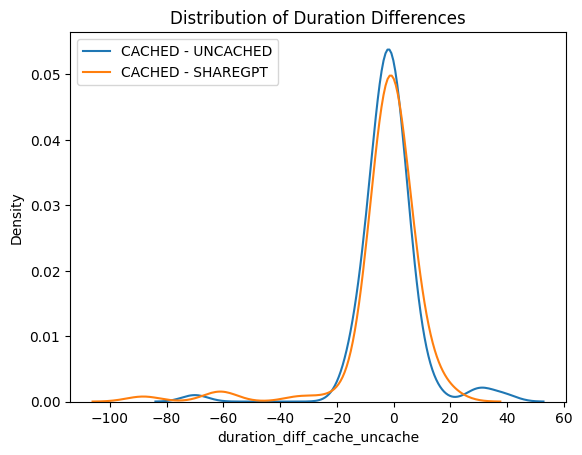

In [183]:
sns.kdeplot(pivot_df['duration_diff_cache_uncache'].dropna(), label='CACHED - UNCACHED')
sns.kdeplot(pivot_df['duration_diff_cache_sharegpt'].dropna(), label='CACHED - SHAREGPT')
# sns.kdeplot(pivot_df['duration_diff_cache_sharegpt10'].dropna(), label='CACHED - SHAREGPT10')
plt.legend()
plt.title("Distribution of Duration Differences")
plt.show()


In [184]:
# Good with Caching
good_cache = pivot_df[pivot_df['duration_diff_cache_uncache'] < 0][['index', 'task', 'duration_diff_cache_uncache']]

# Bad with Caching
bad_cache = pivot_df[pivot_df['duration_diff_cache_uncache'] > 0][['index', 'task', 'duration_diff_cache_uncache']]

# Good with ShareGPT10 (either compared to cache or uncached)
good_sharegpt = pivot_df[
    (pivot_df['duration_diff_cache_sharegpt'] < 0) |
    (pivot_df['duration_diff_uncache_sharegpt'] < 0)
][['index', 'task', 'duration_diff_cache_sharegpt', 'duration_diff_uncache_sharegpt']]

# Bad with ShareGPT10
bad_sharegpt = pivot_df[
    (pivot_df['duration_diff_cache_sharegpt'] > 0) |
    (pivot_df['duration_diff_uncache_sharegpt'] > 0)
][['index', 'task', 'duration_diff_cache_sharegpt', 'duration_diff_uncache_sharegpt']]


In [185]:
good_cache
# bad_cache
# good_sharegpt
# bad_sharegpt

run_type,index,task,duration_diff_cache_uncache
2,1,M2W,-3.464
4,2,M2W,-5.473
7,3,M2W,-2.848
9,4,DBBENCH,-3.084
14,6,M2W,-0.843
16,7,M2W,-2.343
18,8,M2W,-11.225
20,9,M2W,-5.224
25,12,M2W,-2.639
29,14,DBBENCH,-70.022


In [186]:
BASE_DIR = "/home/ubuntu/vishalk/litellm/AgentBench/data/"
DBBENCH = 'dbbench/'
WEBSHOP = 'webshop'
OSS = 'os-std'
M2W = 'mind2web'